# 　下記のコードはビックデータからテストデータと学習データを無作為に選んでいるので毎回実行結果が変化している。

悪性のテストデータ数：53
良性のテストデータ数：90


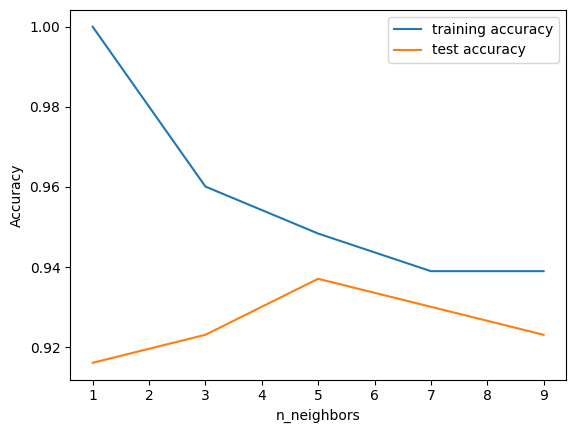

In [5]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# データを読み込む
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)
# ３列目以降を特徴データ
X = df.iloc[:,2:]
# ２列目をラベルデータ
y = df.iloc[:,1]

#　訓練データとテスト用データに分ける
from sklearn.model_selection import train_test_split
# データの分け方を変えてみる
X_train, X_test, y_train, y_test = train_test_split(X, y)

# k近傍法を読み込み
from sklearn.neighbors import KNeighborsClassifier
# k近傍法を、近傍数を変えながら実行する(1,3,5....11)
neighbors_settings = range(1, 11, 2)
training_accuracy = []
test_accuracy = []
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

# グラフ描画
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

#テストデータ数の確認
print("悪性のテストデータ数："+str((y_test == 'M').sum()))
print("良性のテストデータ数："+str((y_test == 'B').sum()))